# Obtain Data and Install

In [ ]:
#This will install the package in the actual jupyter notebook Kernel. [with_Jupyter] is obsolete if you start it out of jupyter, but for demo purpose left inside.
import sys
!{sys.executable} --version
!{sys.executable} -m pip install -e "."[with_jupyter] #"." describes the path to the package, in this case its the same folder.

## Example imports:
import yatclient as yat

from yatclient import TweetAnalyzer,TwitterClient

from yatclient import * #uses __all__ list in __init__.py filename must be declared in this case eg.: twitter_client.TwitterClient

### Enter your twitter Creds here:

In [1]:
#Access
CONSUMER_KEY = "25aKeI8DFf2ew44LSslNwoRBn"
CONSUMER_SECRET = "kkbU4dBNpA9k0Rcu11VMHAt9uv9LjnOohsnaL3xW4itthwOtf1"
ACCESS_TOKEN =  "555424234-wwFaAuK0kYO0V8WTlx71kTwyuQRIRq0QmI8hoRoX"
ACCESS_TOKEN_SECRET = "lLKEDEXnrunCqe9lQ56BkE0XtLdTv9BMKRTmtxGMbtXJl"

### This will download the twitter data of major parties three weeks before European Parliament Election.

In [ ]:
%%time

import yatclient as yat
import datetime

Parties = ["spdde", "fdp","die_Gruenen","afd","dieLinke","fwlandtag","diepartei","cdu","csu"]
EuropawahlDate = datetime.date(2019, 5, 23)
ThreeWeeksBeforeDate = EuropawahlDate - datetime.timedelta(weeks=3)
today = datetime.date.today()

twitter_client = yat.TwitterClient(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET, Parties)

tweets = twitter_client.get_user_timeline_tweets(start_date = str(ThreeWeeksBeforeDate), end_date = str(EuropawahlDate), retweets = True)

analyzer_load = yat.TweetAnalyzer(tweets)
analyzer_load.write_to_csv("tweets{}.csv".format(today), encoding = "utf-8",index = False)
print("saved data to tweets{}.csv\n".format(today))
df = analyzer_load.get_dataframe()
df.head(2)
print("Timeframe from:\n",df.groupby(by=["author"]).date.min(),"\n\nto date:\n",df.groupby(by=["author"]).date.max(),"\n")

In [3]:
import yatclient as yat
import datetime
today = datetime.date.today()
Parties = ["spdde", "fdp","die_Gruenen","afd","dieLinke","fwlandtag","diepartei","cdu","csu"]
twitter_client = yat.TwitterClient(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET, Parties)
users = twitter_client.get_user_data()

user_analyzer = yat.UserAnalyzer(users)
user_analyzer.write_to_csv("users{}.csv".format(today), encoding = "utf-8",index = False)
print("saved data to users{}.csv\n".format(today))

saved data to users2019-07-12.csv



In [2]:
#Wenn Daten bereits vorhanden:
import yatclient as yat
#   
analyzer = yat.TweetAnalyzer()
analyzer.read_from_csv("tweets2019-07-07.csv")
analyzer.get_dataframe().head(5)

,tweets,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
0,"@wiedernichtgan1 @katarinabarley @zdf Hi, wied...",spdde,2019-05-22 22:22:18,0,0,,"wiedernichtgan1, katarinabarley, ZDF",https://t.co/EU0RIHkISH,1131324433459810305,tweet
1,@paulwal97169800 @katarinabarley @zdf @gazprom...,spdde,2019-05-22 22:19:10,0,0,,"PaulWal97169800, katarinabarley, ZDF, GazpromDE",https://t.co/PbmUhKi60D,1131323643613634561,tweet
2,"@kala246 @katarinabarley Hi, Ka!\nVielleicht s...",spdde,2019-05-22 22:17:04,0,0,,"KaLa246, katarinabarley",https://t.co/1Vsloa5gPD,1131323114686746624,tweet
3,"@akitzi @katarinabarley @zdf Hi, a.kitzberger_...",spdde,2019-05-22 22:16:09,0,0,,"AKitzi, katarinabarley, ZDF",https://t.co/1Vsloa5gPD,1131322885300207616,tweet
4,"@coernli @katarinabarley @zdf Hi, Mike!\nhttps...",spdde,2019-05-22 22:14:41,0,0,,"Coernli, katarinabarley, ZDF",https://t.co/M2FPBbeL3y,1131322514498621441,tweet


In [3]:
user_analyzer = yat.UserAnalyzer()
user_analyzer.read_from_csv("users2019-07-12.csv")
df = user_analyzer.get_dataframe()
print(df.sort_values(by=["account_followers"], ascending=False))

        author  account_followers     account_created
2  Die_Gruenen             473241 2008-04-27 00:06:25
0        spdde             364353 2009-03-25 08:41:02
1          fdp             343500 2009-05-12 10:50:27
7          CDU             288092 2009-02-09 11:43:27
4     dieLinke             268235 2009-06-02 11:26:35
8          CSU             191474 2009-02-17 17:18:37
6    DiePARTEI             141126 2009-08-14 10:25:43
3          AfD             139562 2012-09-24 18:43:59
5    fwlandtag               4379 2009-06-16 07:03:54


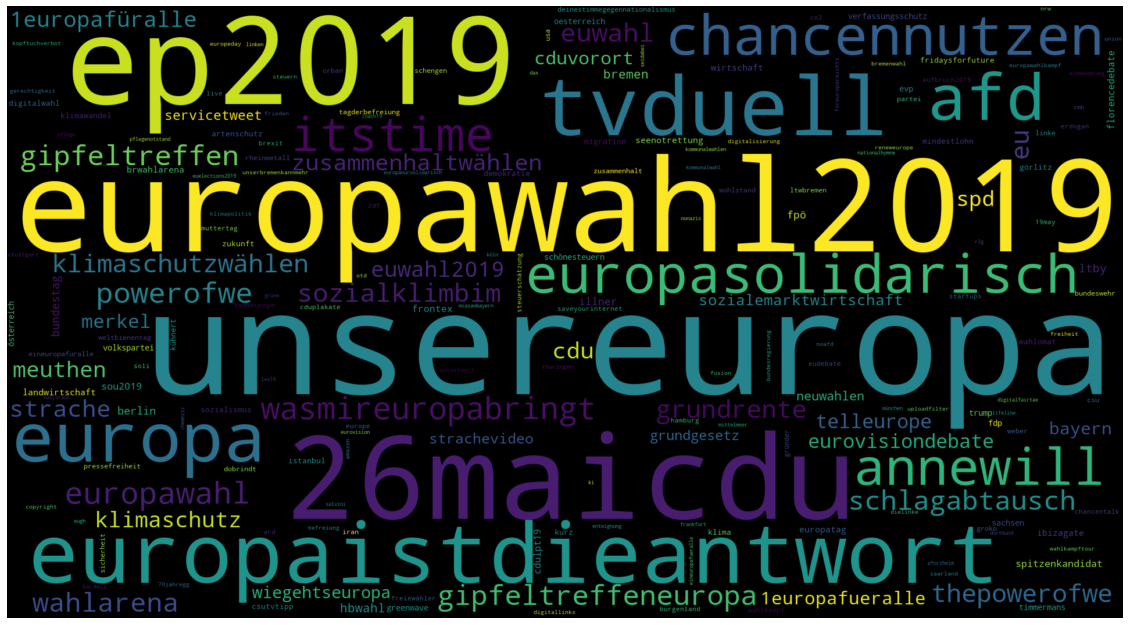

In [11]:
analyzer.wordcloud(type="hashtags", color="black")

In [4]:
colorwin = "#0b6622"
colorloose = "#8b0000"
colordict = {'fwlandtag':colorwin, "CSU":colorloose,
             "fdp":colorwin, "Die_Gruenen":colorwin, "spdde":colorloose, "dieLinke":colorloose,
             "CDU":colorloose, "DiePARTEI":colorwin, "AfD":colorwin}

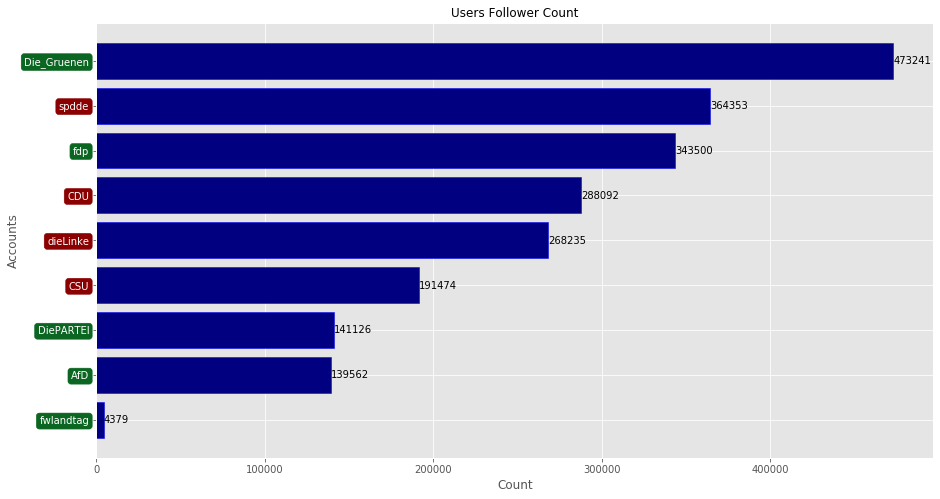

In [7]:
user_analyzer.plot_bar_follower(sort_val=True, colordict = colordict, alpha = 1,
                                xvalues = True, windowsize = (15,8), facecolor = "#000080")

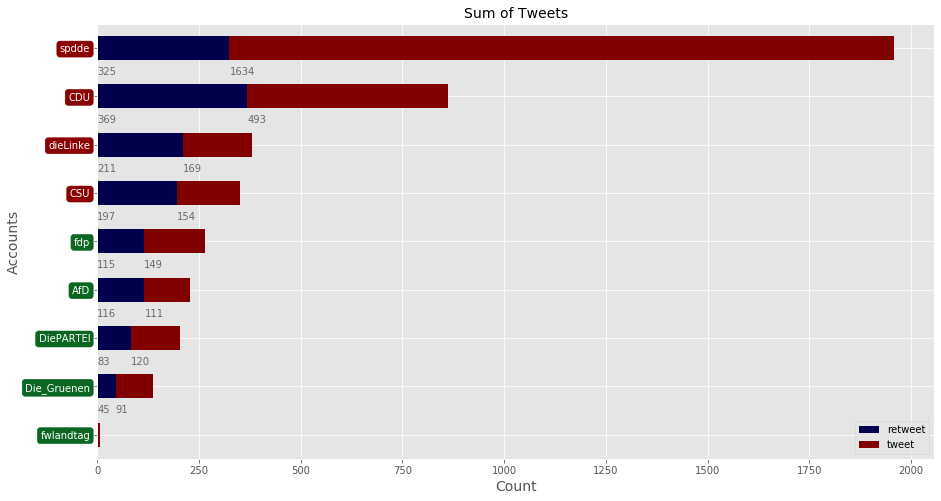

In [12]:
analyzer.plot_bar_sum(type="count", alpha = 1, stacked = True, 
                      xvalues = True, font=14, windowsize = (15,8), sort_val = True, 
                      colordict = colordict, colormap="seismic", facecolor = "#000080")

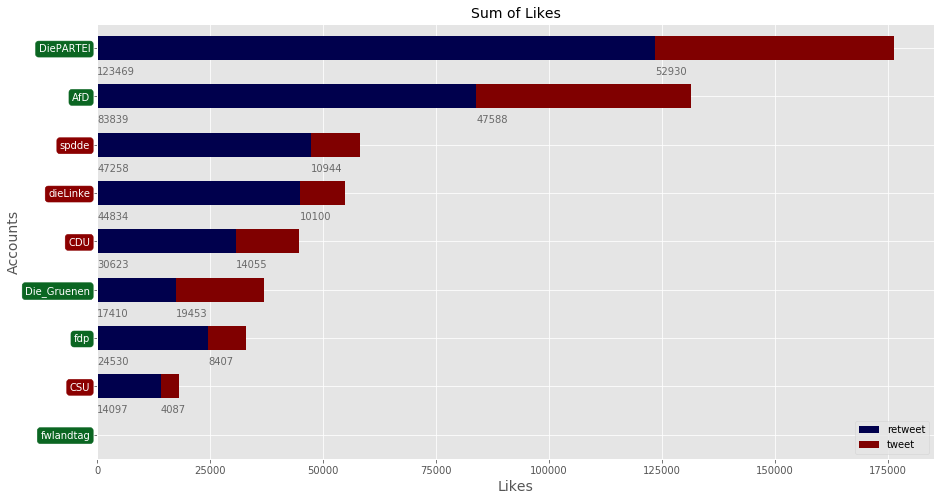

In [13]:
analyzer.plot_bar_sum(type="likes", alpha = 1, stacked = True, 
                      xvalues = True, font=14, windowsize = (15,8), sort_val = True, 
                      colordict = colordict, colormap="seismic", facecolor = "#000080")

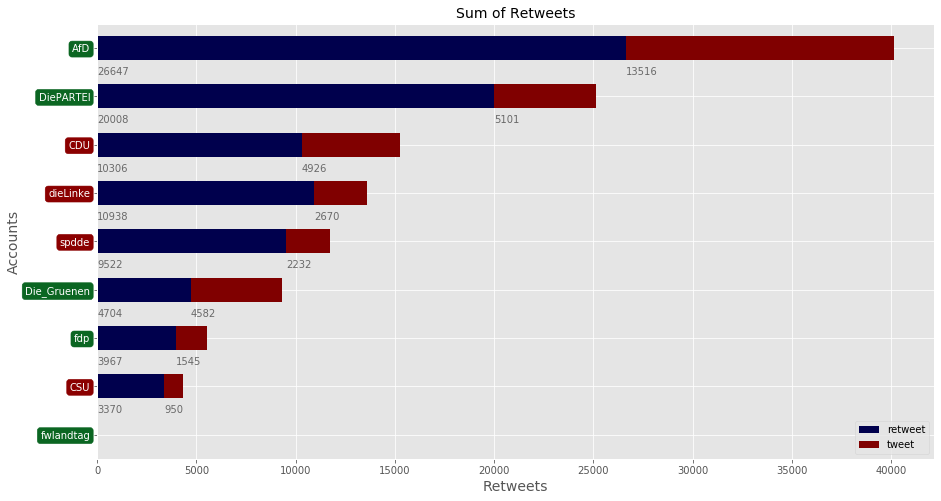

In [14]:
analyzer.plot_bar_sum(type="retweets", alpha = 1, stacked = True, 
                      xvalues = True, font=14, windowsize = (15,8), sort_val = True, 
                      colordict = colordict, colormap="seismic", facecolor = "#000080")